In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [3]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

model.fit(x, y)

#Hint: .fit()

LinearRegression()

Mean squared error equals: 57947526161.28837
Model score:  0.49670880166311393


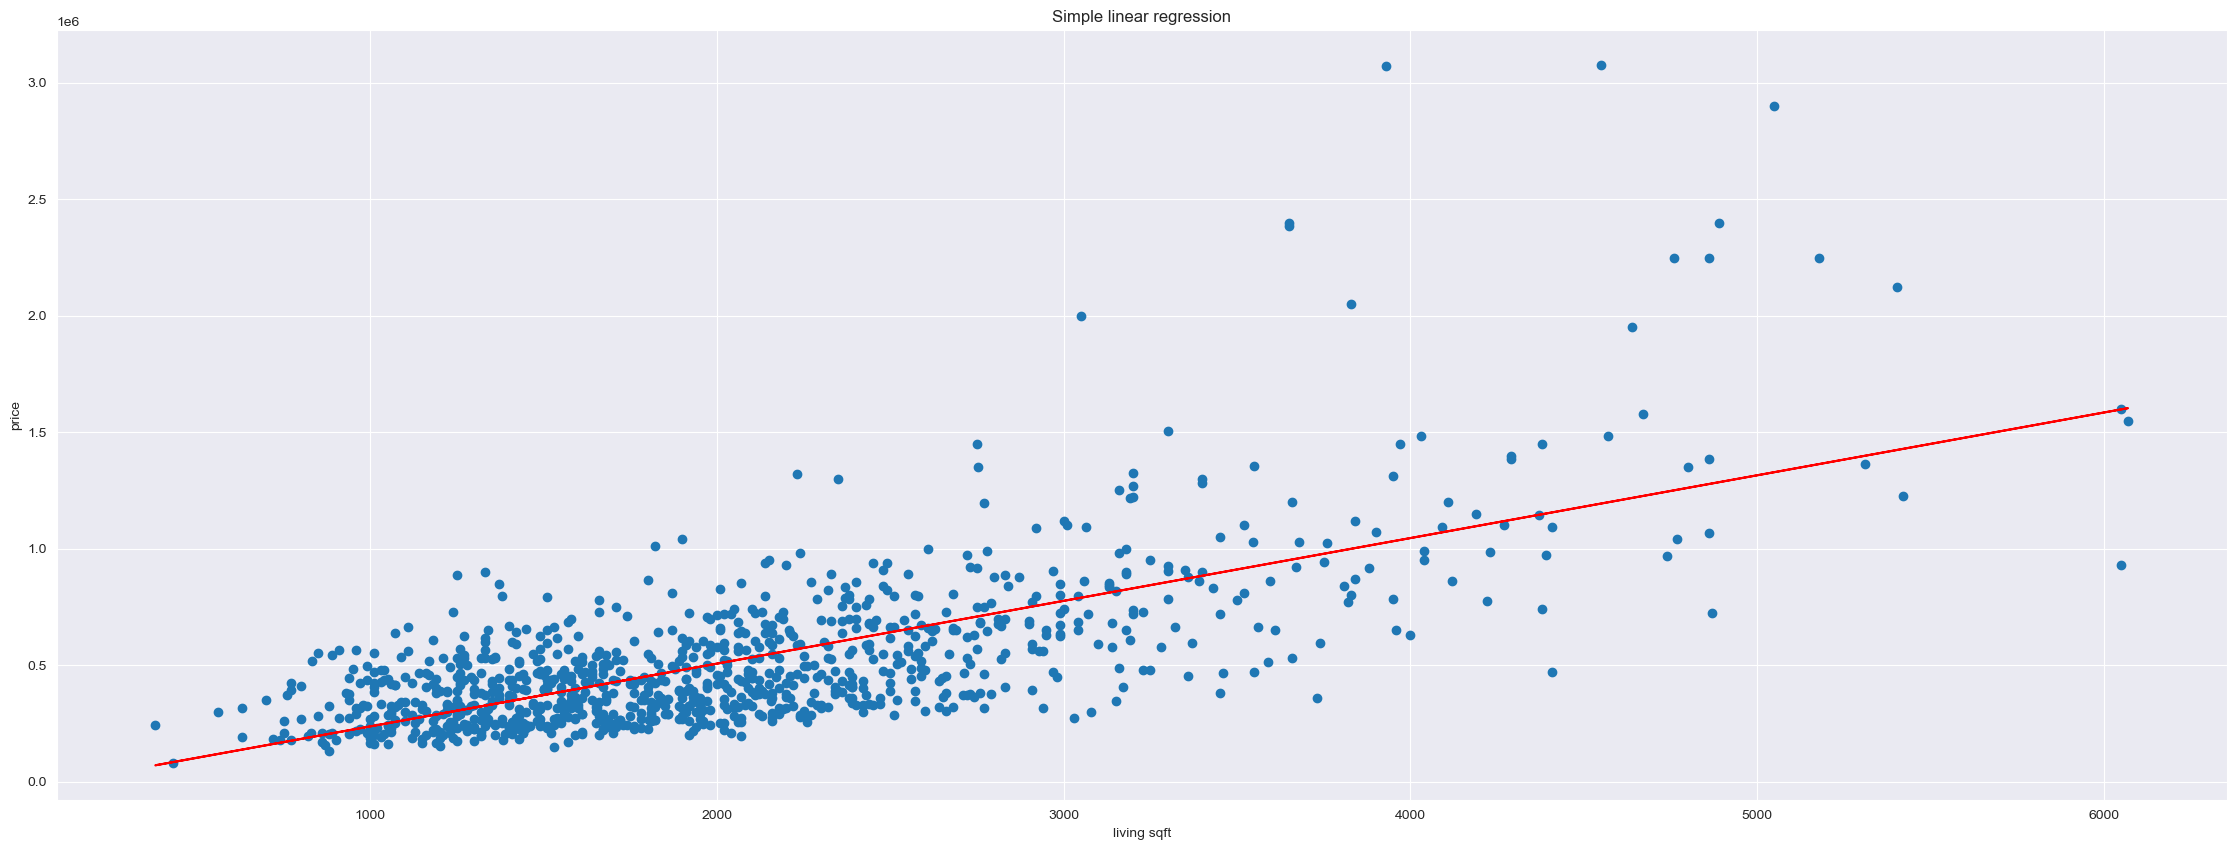

In [4]:
#b)
#Your code:
fig = plt.figure(figsize = (28,10))
plt.xlabel("living sqft")
plt.ylabel("price")
plt.plot(x, (x * model.coef_ + model.intercept_),"r")
plt.scatter(x,y)

plt.title("Simple linear regression")
print('Mean squared error equals:',mean_squared_error(y, (x*model.coef_+model.intercept_)))
print('Model score: ', model.score(x, y))

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

## Comment
The scatter plot shows a positive correlation: larger properties tend to have higher prices, though the variation is substantial.

1. Regression Line: The red line shows the model’s prediction of price based on square footage, but the wide spread of data points indicates that size alone doesn't fully explain the price.
2. Mean Squared Error (MSE): The MSE is quite large, meaning the model’s price predictions deviate significantly from the actual prices.
3. Model Score: The model score is 0.497, meaning it explains about 49.67% of the variance in price. Other factors, like location or condition, likely play a significant role.

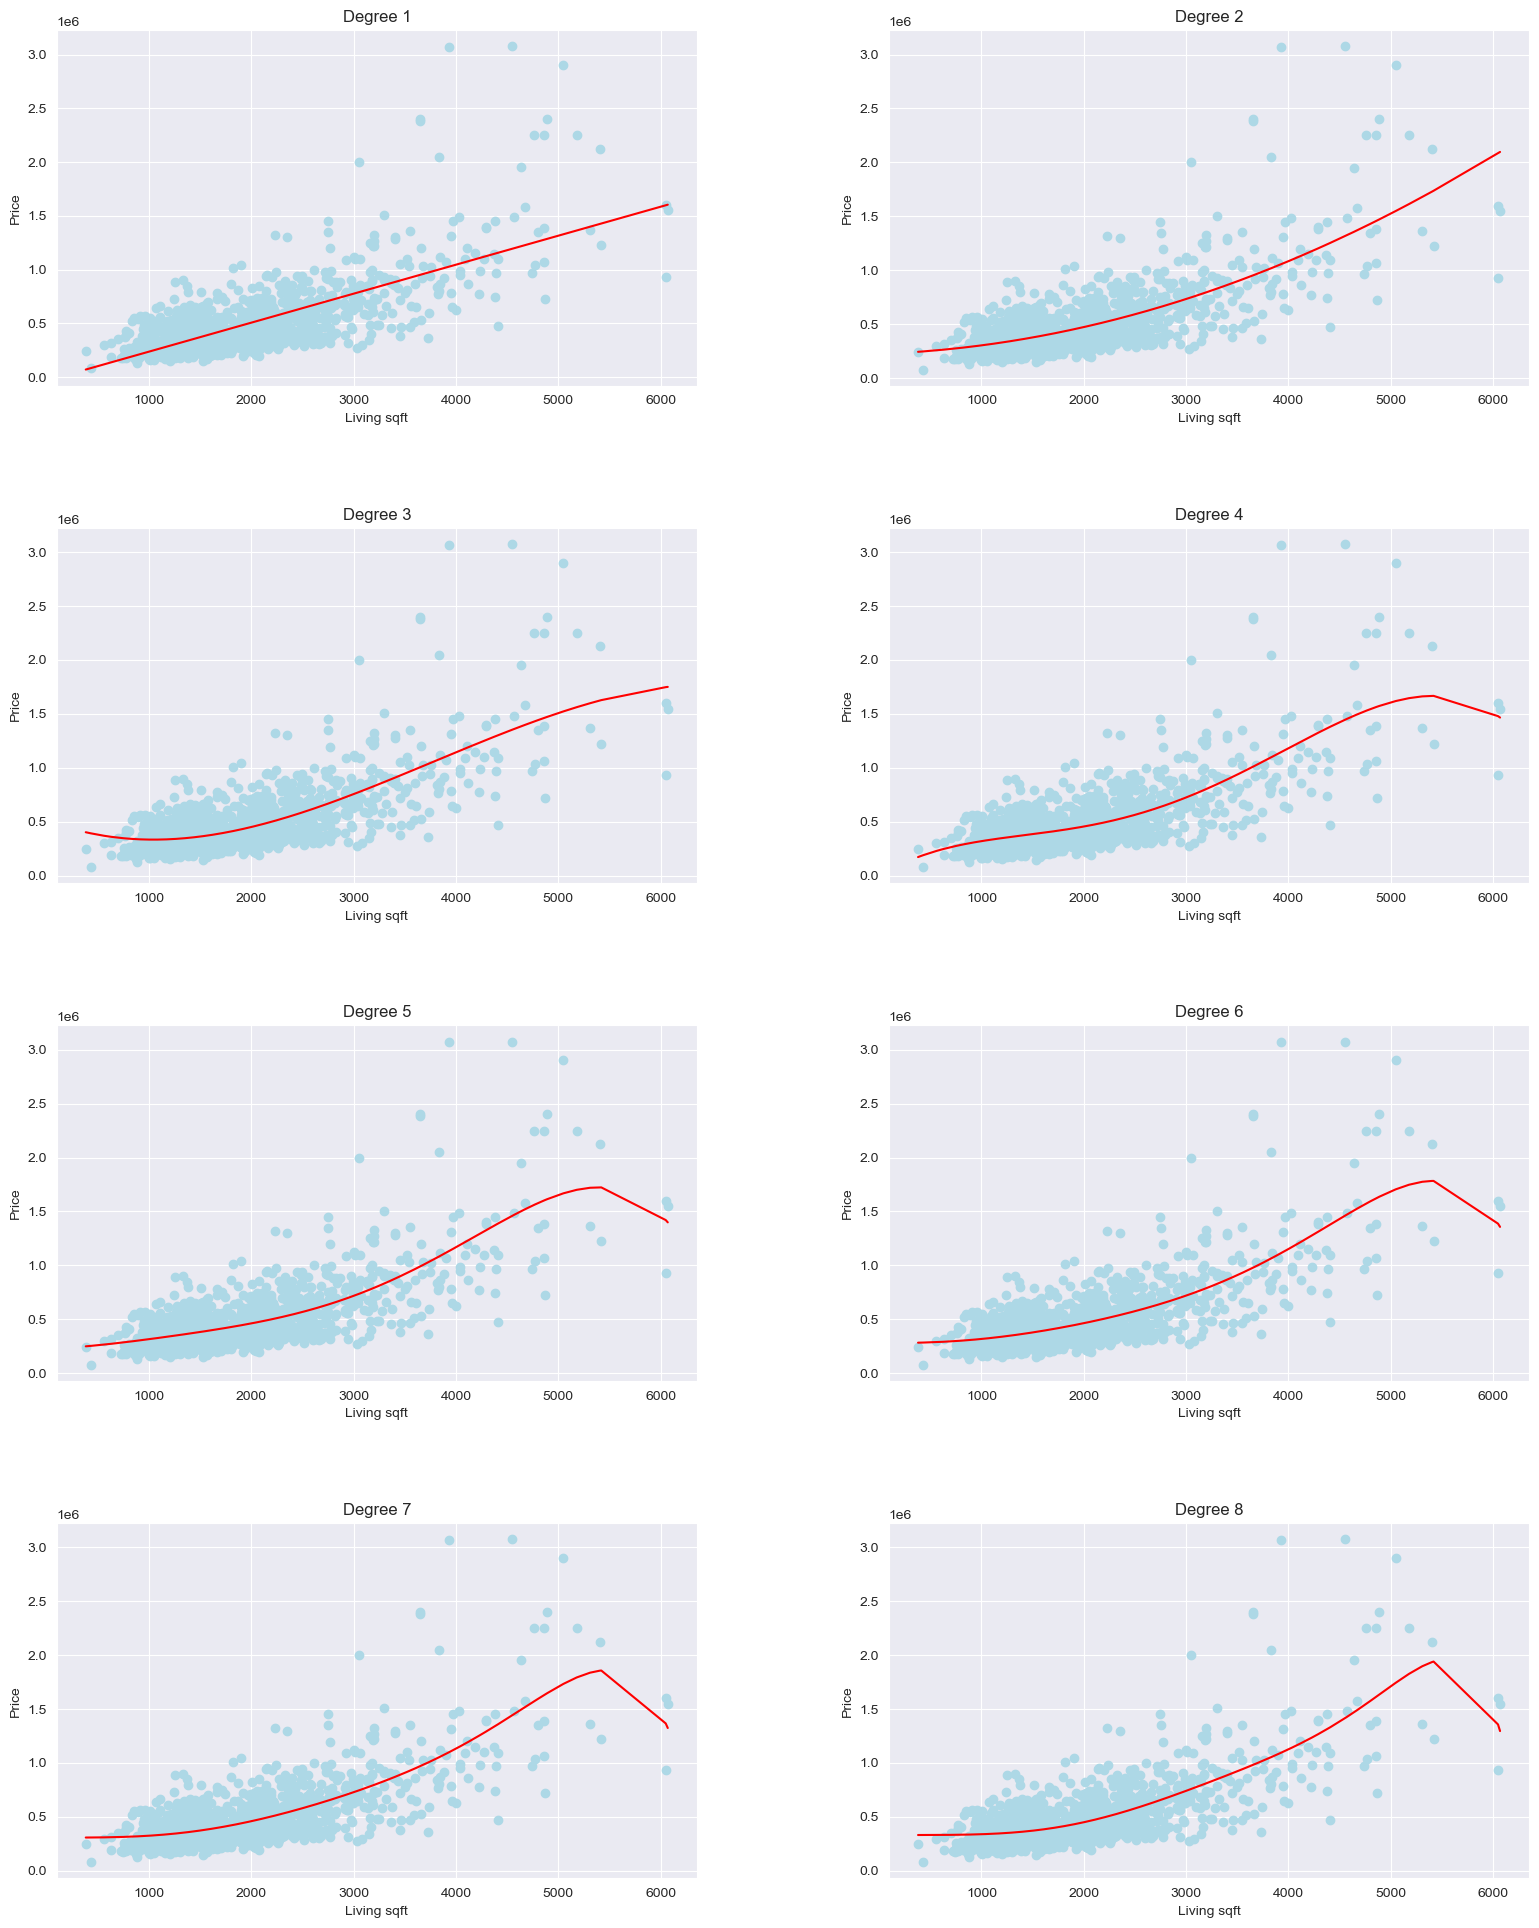

In [14]:
#c)
plt.figure(figsize=(19, 24))
sorted_idx = np.argsort(x.ravel()) 
x_sorted = x[sorted_idx]  
y_sorted = y[sorted_idx]  
mean_sq_err=[]

for order in range(1, 9):  
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(x_sorted)  

    model = LinearRegression()
    model.fit(X_order, y_sorted)  

    y_pred = model.predict(X_order)  

    plt.subplot(4, 2, order)  
    plt.scatter(x_sorted, y_sorted, color='lightblue')  
    plt.plot(x_sorted, y_pred, color='red')  
    plt.title(f'Degree {order}')  
    plt.xlabel('Living sqft')
    plt.ylabel('Price')
    mean_sq_err.append(mean_squared_error(y_sorted, y_pred))

plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


## Comment
1. Lower-degree models (1-3) offer a simple, general fit that captures the overall trend without overcomplicating the relationship. They fit the overall data pattern but may miss subtler nonlinear relationships.
2. Higher-degree models (4-8) from the degree 4 we are starting the overfitting and the model learns the noise in the data rather than just the underlying pattern. The curve becomes more complex, especially at the edges, which could lead to unreliable predictions.


Text(0, 0.5, 'Mean Squared Error')

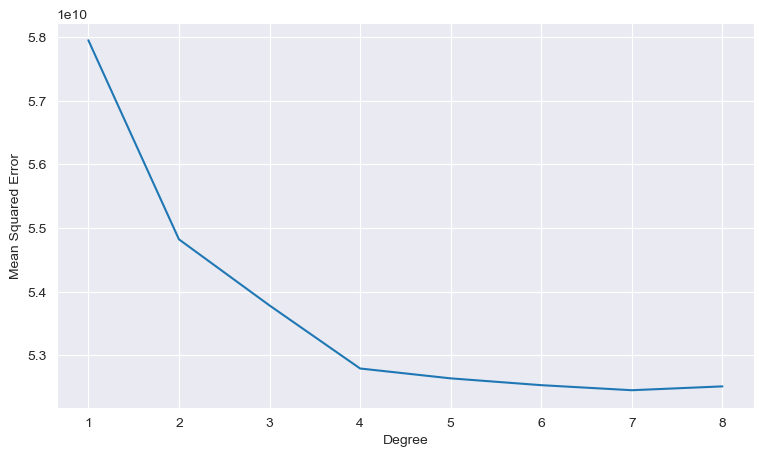

In [6]:
#Your code:
degree=[1,2,3,4,5,6,7,8]
fig=plt.figure(figsize = (9,5))
plt.plot(degree,mean_sq_err)
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')

## Comment
At first glance, the mean squared error (MSE) decreases with higher-degree polynomial models, suggesting better performance. However, these models overfit the data, capturing noise instead of general patterns, making them less reliable for new data. While MSE may drop, the models become too specific to the training set. Additionally, we see that the plot flatten at the end, indicating that more complexity doesn't always improve the model. In summary, a balance is needed between model complexity and reliability to avoid overfitting.

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

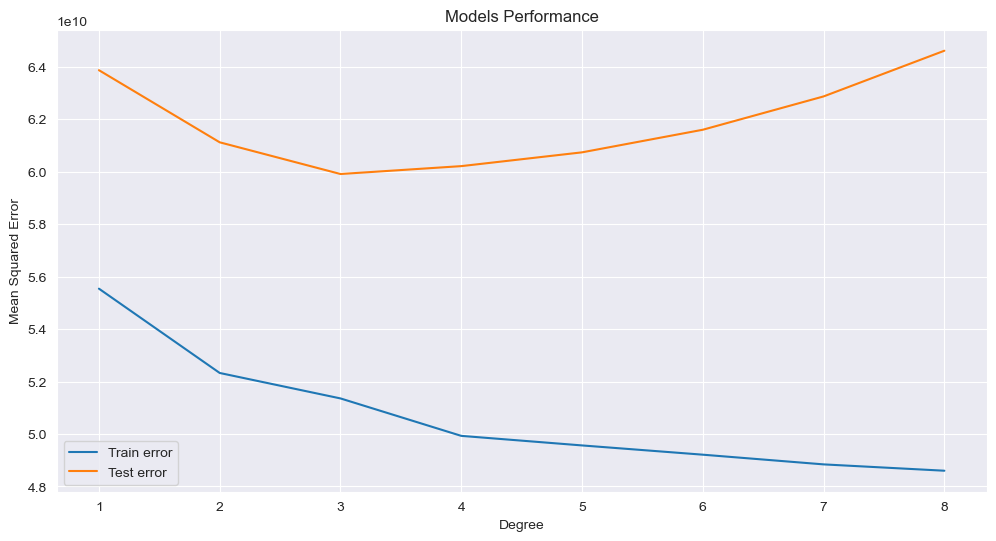

In [7]:
#a)
mean_train=[]
mean_test=[]
for order in range(1,9):
    poly=PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(x)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    mean_train.append(mean_squared_error(y_train, y_pred_train))
    mean_test.append(mean_squared_error(y_test, y_pred_test))
plt.figure(figsize = (12,6))
plt.xlabel('Degree')
plt.ylabel('Mean Squared Error')
plt.plot(degree,mean_train,label="Train error")
plt.plot(degree,mean_test,label="Test error")
plt.title("Models Performance")
plt.legend()

## Comment
As the degree increases, the training error decreases significantly, indicating a better fit to the training data. However, the test error begins to rise after degree 4, which suggests that the model is overfitting to the training set. Degrees 3 and 4 strike a balance between bias and variance, leading to more generalized predictions. This means that simpler models can often perform better on unseen data. Therefore, a degree of 3 is optimal for this dataset, ensuring a good trade-off between complexity and accuracy.


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error equals: 396407.1889615157


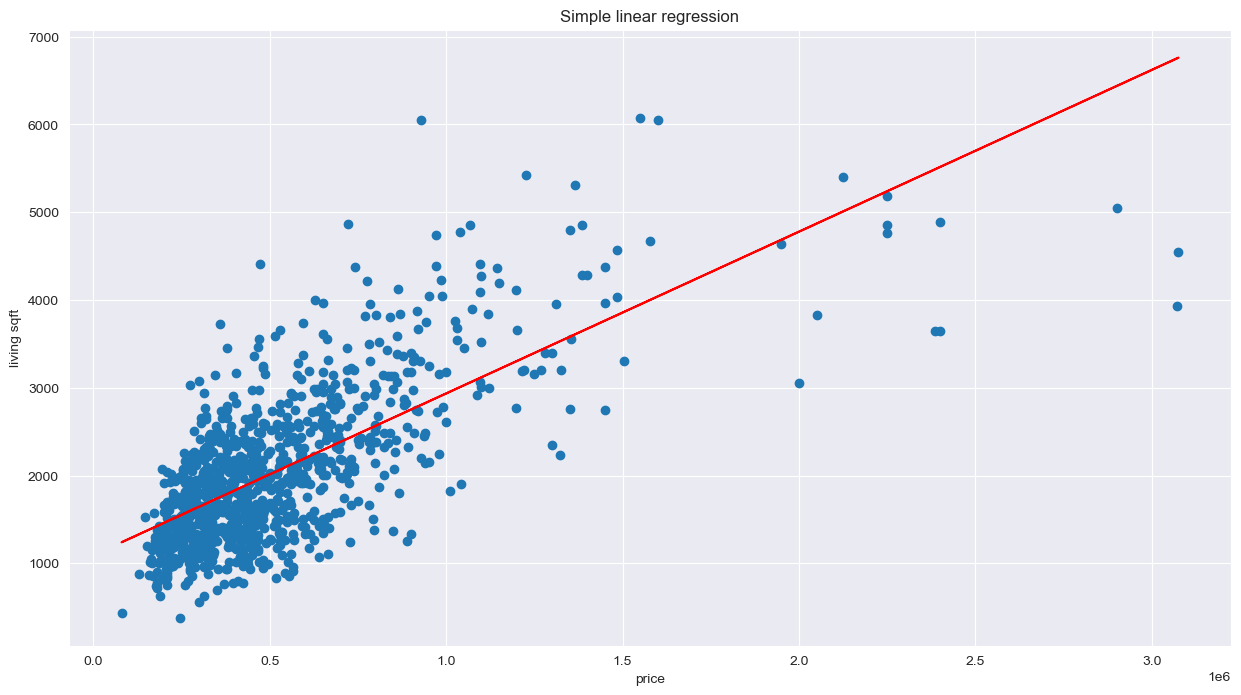

In [8]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model=LinearRegression()
model.fit(X, y)
fig=plt.figure(figsize = (15,8))
plt.scatter(X,y)
plt.plot(X,model.predict(X),'r')
plt.title("Simple linear regression")
plt.xlabel("price")
plt.ylabel("living sqft")
print('Mean squared error equals:',mean_squared_error(y, (X*model.coef_+model.intercept_)))


## Comment
In this scenario, we are predicting the square footage of a house based on its price. This prediction is challenging due to significant price discrepancies for houses with the same square footage, leading to a poorly fitted regression line and increased bias from numerous outliers. Using a higher-degree polynomial regression could improve the fit of the regression line to the data points, allowing it to capture the underlying trends more effectively. 

In [9]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test=model.predict(X_test)
mean_train.append(mean_squared_error(y_train, y_pred_train))
mean_test.append(mean_squared_error(y_test, y_pred_test))

print("Mean squared error equals for testing values: {0}".format(mean_squared_error(y_pred_test, y_test)))
print("Mean squared error equals for training values: {0}".format(mean_squared_error(y_pred_train, y_train)))
print("Average: ", (mean_squared_error(y_pred_test, y_test)+mean_squared_error(y_pred_train, y_train))/2)


Mean squared error equals for testing values: 48749392655.588135
Mean squared error equals for training values: 45676641274.10861
Average:  47213016964.84837


In [10]:
X = house_df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors',
              'waterfront', 'view', 'condition', 'grade',
              'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
              'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']].values.reshape(-1,18)

y = house_df['price']

poly = PolynomialFeatures(1, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test=model.predict(X_test)
mean_train.append(mean_squared_error(y_train, y_pred_train))
mean_test.append(mean_squared_error(y_test, y_pred_test))

print("Mean squared error equals for testing values: {0}".format(mean_squared_error(y_pred_test, y_test)))
print("Mean squared error equals for training values: {0}".format(mean_squared_error(y_pred_train, y_train)))
print("Average: ", (mean_squared_error(y_pred_test, y_test)+mean_squared_error(y_pred_train, y_train))/2)

Mean squared error equals for testing values: 41139338695.79325
Mean squared error equals for training values: 40226901589.00451
Average:  40683120142.39888


## Comment 
The performance of my 1st-degree model with all variables is interesting, as it typically suggests overfitting. However, this could be attributed to several factors:

1. The linear nature of the model limits flexibility, reducing the risk of overfitting, even with many variables.
2. All included variables might be strongly correlated with the target (price), adding value without leading to overfitting.
3. A sufficiently large dataset helps the model generalize better, mitigating overfitting risks often seen in smaller datasets.

In summary, the model's effectiveness can be attributed to its simplicity, relevant variables, and possibly a large enough dataset, while more complex models may be more prone to overfitting.
Now, we will try to do better model, but first I need to find out the correlation between all of these variables and choose the best ones.

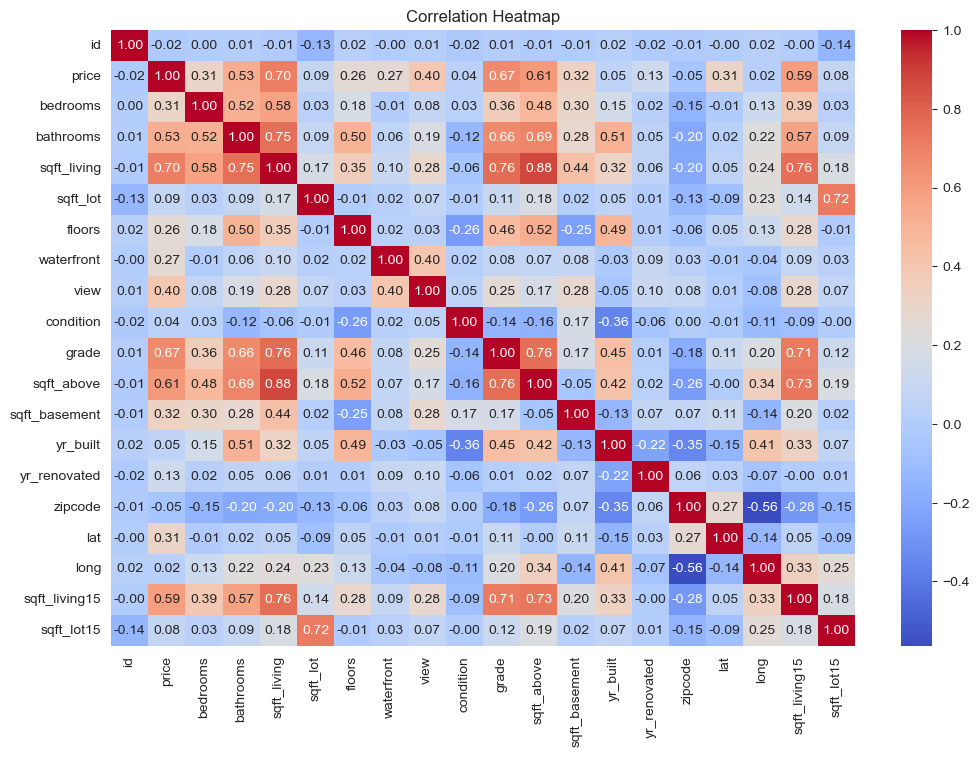

In [11]:
corr_matrix = house_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Comment
There are significant correlation between price and bathrooms, sqft_living, grade, sqft_above, sqft_living15, view. So, let's try to build a model based on these variables. 

In [12]:
X_corr_columns_with_price=house_df[['bathrooms','sqft_living','view', 'grade','sqft_above','sqft_living15','condition','lat']].values.reshape(-1,8)
Y_price=house_df['price'].values.reshape(-1)
MSE_train=[]
MSE_test=[]
for order in range(1,6):
    poly=PolynomialFeatures(order, include_bias=False)
    X_poly=poly.fit_transform(X_corr_columns_with_price)
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=43)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test=model.predict(X_test)
    MSE_train.append(mean_squared_error(y_train, y_pred_train))
    MSE_test.append(mean_squared_error(y_test, y_pred_test))
for MSE, num in zip(MSE_test, range(1, 6)):
    print("Mean squared error for degree: {0}, equals for testing values: {1}".format(num, MSE))

for MSE, num in zip(MSE_train, range(1, 6)):
    print("Mean squared error for degree: {0}, equals for training values: {1}".format(num, MSE))
for diff in range(0, 5):
    print("Average MSE train and test for degree ", diff+1," : ", (MSE_test[diff] + MSE_train[diff])/2)

Mean squared error for degree: 1, equals for testing values: 49213375025.34734
Mean squared error for degree: 2, equals for testing values: 38078270692.62302
Mean squared error for degree: 3, equals for testing values: 38032850035.36985
Mean squared error for degree: 4, equals for testing values: 57870929908.60717
Mean squared error for degree: 5, equals for testing values: 822306163542.2142
Mean squared error for degree: 1, equals for training values: 47228256899.21745
Mean squared error for degree: 2, equals for training values: 34250612603.640656
Mean squared error for degree: 3, equals for training values: 29857648807.130486
Mean squared error for degree: 4, equals for training values: 27480447142.629635
Mean squared error for degree: 5, equals for training values: 44984546896.8321
Average MSE train and test for degree  1  :  48220815962.282394
Average MSE train and test for degree  2  :  36164441648.131836
Average MSE train and test for degree  3  :  33945249421.250168
Average MSE

## Comment 
First, besides the variables with a strong correletion with the price I also add to the model two variables: 'condiditon' and 'lat' to create well performed model . So, the best one to choose is the 3nd-degree model. It achieves the lowest MSE on the test set and the lowest Average between MSE from the test and train set. The model maintain a manageable difference between training and test  MSE, indicating a good balance between fit and generalization.  The strategy of selecting variables with a high correlation to price proved to be an appropriate decision, as it helped the model focus on the most relevant features. So far this is the best model.

In [13]:
X_lasso = house_df[['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'condition', 'grade',
                    'sqft_above', 'sqft_living15', 'sqft_lot15','lat','view','yr_renovated','yr_built']].values.reshape(-1,13)

y_lasso = house_df['price']

X_train, X_test, y_train, y_test = train_test_split(X_lasso, y_lasso, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(max_iter=5000)

param_grid = {'alpha': [0.1, 0.3, 0.6, 1.0, 10.0, 50.0, 100.0, 125.0, 150.0 ,200.0,250.0,300.0,500.0,1000.0]}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha value from GridSearchCV: {best_alpha}")

best_lasso = Lasso(alpha=best_alpha, max_iter=5000)
best_lasso.fit(X_train_scaled, y_train)

y_pred_test = best_lasso.predict(X_test_scaled)
y_pred_train = best_lasso.predict(X_train_scaled)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error (MSE) for Lasso Regression with best alpha on test values: {mse_test}")
print(f"Mean Squared Error (MSE) for Lasso Regression with best alpha on train values: {mse_train}")
print(f"Average MSE train and test: ", (mse_test + mse_train) / 2)

Best alpha value from GridSearchCV: 150.0
Mean Squared Error (MSE) for Lasso Regression with best alpha on test values: 47403396328.68505
Mean Squared Error (MSE) for Lasso Regression with best alpha on train values: 41726323797.81566
Average MSE train and test:  44564860063.25035


## Comment
Here, I tried to create a Lasso regression which is sligtly better from the proposed one, but still worse from the previous model.  The Lasso regularization didn't perform well because the model aggressively reduces less important variable coefficients to zero, which can lead to losing valuable information. Additionally, if the data is poorly scaled or there is high multicollinearity between variables, Lasso may overly shrink the variables resulting in worse prediction performance.


# Podium
1. Model with correlation variables with the price ( 3 degree Linear Regression) points: 33942879505.02584
2. Model with correlation variables with the price ( 2 degree Linear Regression) points: 36164443504.31918
3. Model with all the variables ( 1 degree Linear Regression) points: 40691791058.281364